# Multiple-event probability problems

Assum 100,000 simulations ran for each question.

In [41]:
# set imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set my random seed
# np.random.seed(43)

# gobal number of iterations
iterations = 100_000

1. Two dice are rolled. What is the probability that the sum of the two numbers rolled is equal to 7?

In [2]:
# dice creation
dice = np.arange(1,7)
num_dice = 2

# ran iterations and make random choices
rand_selection = np.random.choice(a=dice, size=(iterations, num_dice))

# find sum of two equaling 7
rand_selection = rand_selection.sum(axis=1) == 7


# get mean
rand_selection.mean()

0.16631

    - The probability of rolling a sum of 7 on two dice is approximately 0.1667 or 16.67%.

2. A bag contains 4 red balls, 3 blue balls, and 5 green balls. If you randomly select three balls without replacement, what is the probability of selecting exactly two red balls and one blue ball?

In [3]:
balls = ["red", "blue", "green"]
weight = [4/12, 3/12, 5/12]
n_event = 3

iterations = 100_000
rand_selection = np.random.choice(a=balls, size=(iterations, n_event), p=weight)

# Count the number of selections with exactly two red balls and one blue ball
rand_selection = ((rand_selection == "red").sum(axis=1) == 2) & ((rand_selection == "blue").sum(axis=1) == 1)

rand_selection = rand_selection.astype(int) # make then integers for the plot
rand_selection_prob = rand_selection.mean()
rand_selection_prob

0.08322

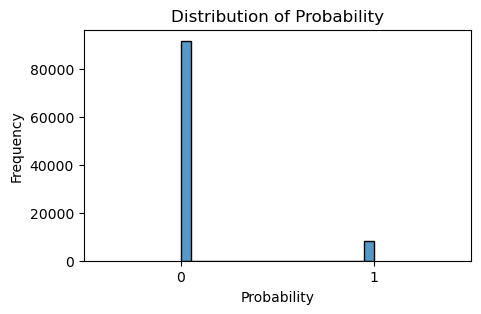

In [4]:
plt.figure(figsize=(5,3))
sns.histplot(rand_selection)

plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Probability")

plt.xticks([0,1])
plt.margins(x=.5)
plt.show()

    - The probability of selecting exactly two red balls and one blue ball is approximately 0.08448.

3. A box contains 6 red marbles and 4 white marbles. Two marbles are drawn from the box without replacement. What is the probability that both marbles drawn are red?

In [5]:
marble = ["red",  "white"]
weight = [6/10, 4/10]
marb_draw = 2

rand_selection = np.random.choice(marble, (iterations,marb_draw), weight)

rand_selection = (rand_selection == "red").sum(axis=1) == 2
rand_selection.mean()

0.25114

    - The probability of drawing two red marbles from the box without replacement is approximately 0.249.

4. In a game, you have a deck of 40 cards, numbered from 1 to 40. If you draw two cards at random, what is the probability that the sum of the two numbers is divisible by 5?

In [6]:
deck = np.arange(1,41)
cards_draw = 2

rand_selection = np.random.choice(deck, (iterations, cards_draw))

rand_selection =(rand_selection).sum(axis=1) % 5 == 0

rand_selection.mean()

0.20061

    - The probability that the sum of two cards drawn from a deck of 40 cards is divisible by 5 is approximately 0.197.

5. A bag contains 10 red balls and 8 blue balls. Two balls are drawn from the bag with replacement. What is the probability of drawing a red ball on the first draw and a blue ball on the second draw?

In [7]:
balls = ["red", "blue"]
weight = [10/18, 8/18]
ball_draw = 2

rand_selection = np.random.choice(balls, (iterations, ball_draw), weight)
rand_selection_red = (rand_selection == "red").sum(axis=0)
rand_selection_blue = (rand_selection == "blue").sum(axis=0)

rand_selection_red[0] / iterations * rand_selection_blue[1] / iterations

0.2503100945

    - The probability of drawing a red ball on the first draw and a blue ball on the second draw, with replacement, is approximately 0.2144 or 21.44%.

6. A box contains 5 red socks and 4 white socks. If you randomly select three socks from the box without replacement, what is the probability of selecting two red socks and one white sock?

In [10]:
sock = ["red", "white"]
wight = [5/9, 4/9]
num_evets = 3

rand_selection = np.random.choice(sock, (iterations, num_evets), weight)

rand_selection = ((rand_selection == "red").sum(axis=1) == 2) & ((rand_selection == "white").sum(axis=1) == 1)

rand_selection.mean()

0.37479

    - The probability of selecting two red socks and one white sock when three socks are drawn without replacement is approximately 0.37479.

7. In a card game, you have a standard deck of 52 cards. If you draw five cards at random, what is the probability of getting a full house (three cards of one rank and two cards of another rank)?

In [2]:
from scipy import stats

cards = np.arange(1,14)
card_draw = 5

def is_full_house(hand):
    rank, counts = np.unique(rand_selection, return_counts=True)
    return (len(rank) == 2) & (3 in counts) & (2 in counts)

rand_selection= np.random.choice(cards, (iterations, card_draw))

is_full_house_selection = np.apply_along_axis(is_full_house, axis=1, arr=rand_selection)

is_full_house_selection

KeyboardInterrupt: 

    - The probability of getting a full house (three cards of one rank and two cards of another rank) when drawing five cards from a standard deck of 52 cards is approximately 0.0014 or 0.14%.

8. A box contains 6 black balls, 4 white balls, and 5 green balls. If you randomly select three balls without replacement, what is the probability of selecting at least one black ball and one white ball?

In [8]:
balls = ["black", "white", "green"]
weight = [6/15, 4/15, 5/15]
events = 3

rand_selection= np.random.choice(balls, (iterations, events), weight)
rand_selection = ((rand_selection == "black").sum(axis=1) >= 1) & (rand_selection == "white").sum(axis=1) == 1

rand_selection.mean()

0.33268

    - The probability of selecting at least one black ball and one white ball when three balls are drawn without replacement from a box containing 6 black balls, 4 white balls, and 5 green balls is approximately 0.33268.

9. Two coins are flipped. What is the probability of getting at least one head?

In [11]:
coins = ["head", "tail"]

rand_selection = np.random.choice(coins, (iterations,2))
rand_selection = (rand_selection == "head").sum(axis=1) >= 1

rand_selection.mean()

0.74986

    - The probability of getting at least one head when two coins are flipped is approximately 0.7503 or 75.03%.

10. A jar contains 5 red marbles, 3 blue marbles, and 2 green marbles. If you randomly select two marbles from the jar without replacement, what is the probability of selecting two marbles of different colors?

In [55]:
marble = ["red", "blue", "green"]
weight = [5/10,3/10,2/10]
event = 2

rand_selection = np.random.choice(marble, (20,event), weight)

computed_uniqueness = np.unique(rand_selection, axis=1)
lenght_applyed = np.apply_along_axis(np.size,axis=1,arr =computed_uniqueness)

computed_uniqueness


array([['blue', 'blue'],
       ['blue', 'green'],
       ['green', 'green'],
       ['green', 'blue'],
       ['red', 'blue'],
       ['green', 'red'],
       ['red', 'green'],
       ['green', 'red'],
       ['green', 'green'],
       ['red', 'red'],
       ['blue', 'green'],
       ['red', 'blue'],
       ['green', 'blue'],
       ['blue', 'blue'],
       ['green', 'red'],
       ['blue', 'red'],
       ['red', 'red'],
       ['blue', 'blue'],
       ['blue', 'green'],
       ['blue', 'green']], dtype='<U5')

    - The probability of selecting two marbles of different colors when two marbles are drawn without replacement from a jar containing 5 red marbles, 3 blue marbles, and 2 green marbles is approximately 0.6813 or 68.13%.